In [78]:
# upload libraries to prepare data
import os
import numpy as np
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

IMG_HEIGHT = 200
IMG_WIDTH = 200

In [2]:
def debug_photo( photo  ):
    fig = plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5
    for i in range(1, columns*rows +1):
        loc = np.random.randint(1, len(photo),1 )
        img= photo[loc[0]]  # 1 class pictures , sampled randomly
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
        

In [9]:
# https://chadrick-kwag.net/cv2-resize-interpolation-methods/

def preprocess_image( x, h=IMG_HEIGHT , w=IMG_WIDTH, pad_value=30, color_scheme=cv2.COLOR_BGR2RGB, inter_method=cv2.INTER_CUBIC ): # cv2.INTER_AREA
    
        timage = cv2.cvtColor(x, color_scheme) 
        
        timage = cv2.copyMakeBorder(timage, pad_value, pad_value, pad_value, pad_value, 
                                           cv2.BORDER_CONSTANT, None, value=[255, 255, 255] ) 
        
        timage=cv2.resize(timage, (h, w), # make all pictures standard
                                 interpolation = inter_method)
        
        return timage
        

In [34]:
# verify function
# buf_path = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\1_Raw_Data_Train_Test\apple_y_braeburn_1\r0_47.jpg"
# buf_image = cv2.imread( buf_path, cv2.IMREAD_COLOR)
# output = preprocess_image(image = buf_image)
# plt.imshow( output )

In [10]:
## delete files
buf1 = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\2_Train_Test_Augmented_1_class"
buf2 = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\3_Train_Test_Augmented_0_class"
buf3 = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\4_Train_Test_NON_Augmented_0_class"
buf4 = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\5_Test_FN_0_class\Augmented_1"
buf5 = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\5_Test_FN_0_class\Augmented_2"

for i in [buf1, buf2, buf3, buf4, buf5] :
    for j in os.listdir( i ):
        file_delete = os.path.join(i, j)
        os.remove(file_delete)
    

In [2]:
## We preprocess data which forms both trainig and test pics,  later we would apply
## train_test_split method to generate 70 30 split, 

In [11]:
# location of pictures for train, validation and testing
folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\1_Raw_Data_Train_Test"
folder_train

'D:\\0_Desctop_Files\\Learning\\UTM_Project\\1_Prototype\\1_Raw_Data_Train_Test'

In [7]:
os.listdir(folder_train) # debug

['apple_y_braeburn_1',
 'apple_y_crimson_snow_1',
 'apple_y_red_1',
 'apple_y_red_2',
 'apple_y_red_3',
 'apple_y_red_delicios_1',
 'apple_y_red_yellow_1',
 'Banana Lady Finger_1',
 'Banana Red_1',
 'Banana_1',
 'cabbage_white_1',
 'Cantaloupe_1',
 'Cocos_1',
 'forest_train_test',
 'Walnut_1',
 'Watermelon_1']

In [12]:
## import pictures and generate labels to train model

img_data_array_0_class=[] # store pixels  of 0 class
img_data_array_1_class=[] # store pixels of target class


for dir1 in os.listdir(folder_train): # loop through folder in main directory
    for dir2 in os.listdir ( os.path.join(folder_train, dir1) ): # loop through jpg's in each folder
    
         if dir1 !="forest_train_test": # we skip forest_train_test, used later 
            
            image_path= os.path.join(folder_train, dir1,  dir2) # full path to file we need to upload

            image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions

            image = preprocess_image(x = image)

              ## 1 class is stored separately as lated we need to augment pictures plus we add white padding
            if dir1.split("_")[1]=="y": # if folder with pictures contains "y" in name , then its 1, red apple, 0 otherwise
                         
                img_data_array_1_class.append(image) # append each picture to single structure              
                
            else: # pictures which belong to non apples ( other consumables , tasty and healthy )

                img_data_array_0_class.append(image) # append each picture to single structure
   

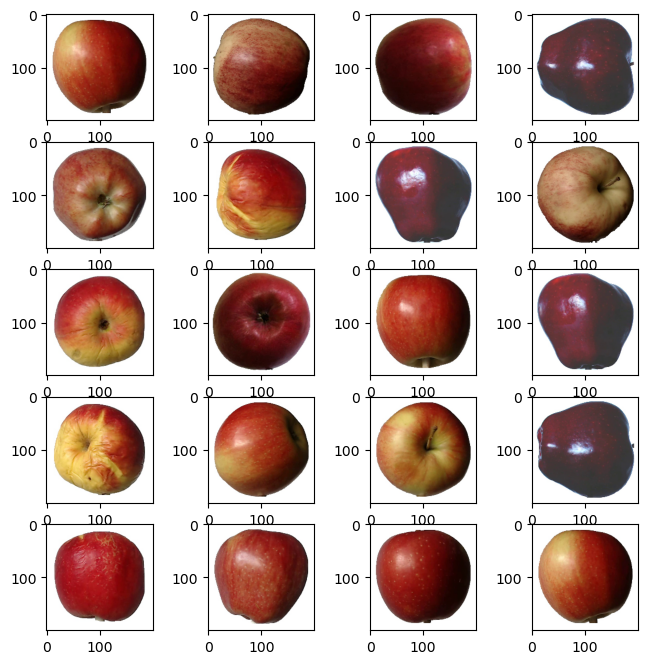

In [13]:
debug_photo( photo=img_data_array_1_class )     

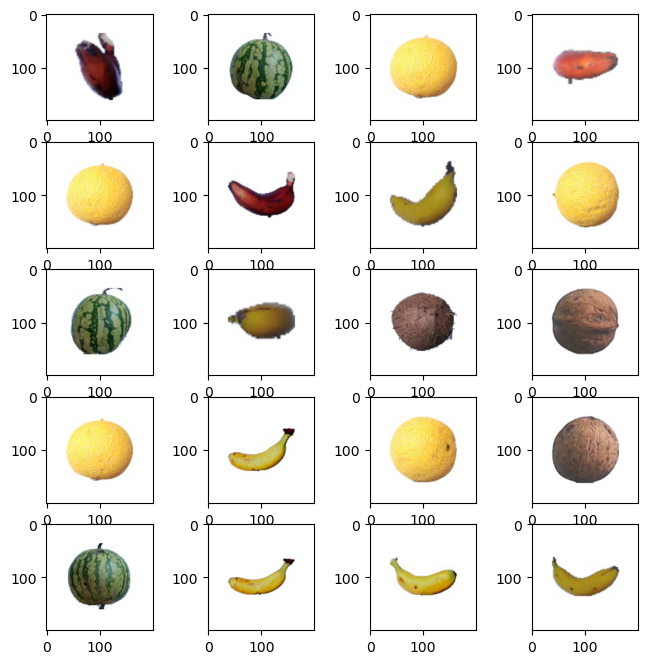

In [14]:
debug_photo( photo=img_data_array_0_class )    

In [91]:
########## Generate "picture blending" for backgroud
### We would train models with pictures with white background
### being unrealistic in real circumstances , we well as 
### generate synthetic ( augmented data ) to be as close as possible to 
### realistic diverse and representative input

In [15]:
## Uplaod pictures on nature scenery

folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\1_Raw_Data_Train_Test\forest_train_test"

img_data_array_backgroud=[] # store pixels 

for dir1 in os.listdir(folder_train): # loop through files in each folder
    
        image_path= os.path.join(folder_train, dir1)
        
        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture
        
        image = preprocess_image(image, pad_value=0)
       
        img_data_array_backgroud.append(image) # append each picture to single structure
       

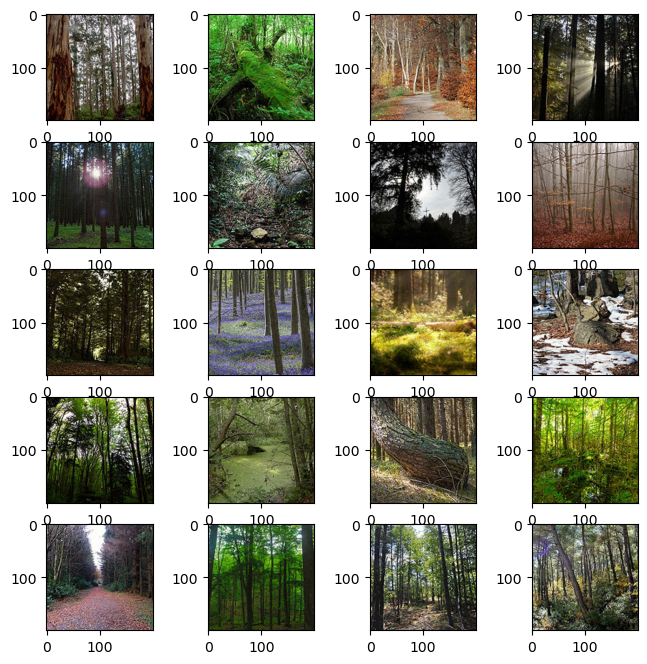

In [16]:
# debug
debug_photo( photo=img_data_array_backgroud )    

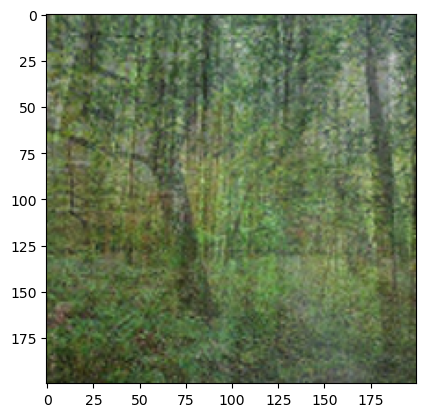

In [23]:
#### Sample of blended backgroupd
#### We generate picture which would substitute
#### white backgound

loc = np.random.randint(1, len(img_data_array_backgroud) ,5 )
equal_fraction = 1 / 5
output = np.zeros_like( img_data_array_backgroud[0] )

list_images = [ img_data_array_backgroud[x] for x in loc ]

for img in list_images:
    output = output + img * equal_fraction
    
output = output.astype(np.uint8)    

plt.imshow(output)

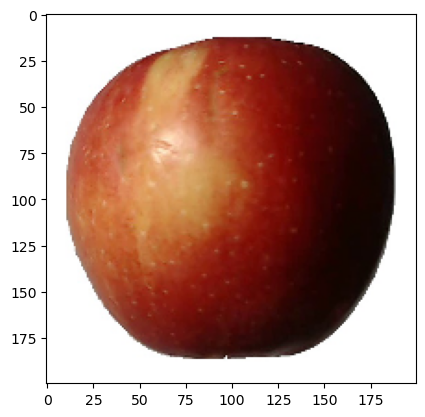

In [24]:
### verify preprocessing with 1 example
apple = img_data_array_1_class[0] 
plt.imshow( img_data_array_1_class[0] ) # debug

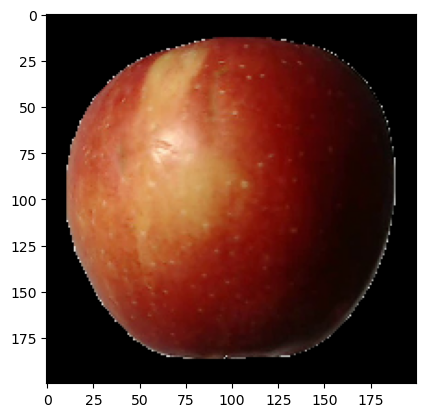

In [25]:
## each picture consist of 3 dimensions, Red , Blue and Green
## we create filter to assign  0 for each value within 3 dimensions
## which is over 230 ( white colour )

white_filter = (apple[:,:,0] > 220) & (apple[:,:,1] > 220) & (apple[:,:,2] > 220)

masked_image = np.copy(apple)
masked_image[white_filter != 0] = [0, 0, 0]
plt.imshow(masked_image)

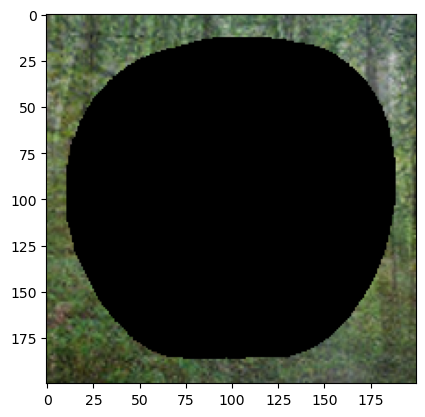

In [26]:
background_image = output.copy()
background_image[~(white_filter)] = [0,0,0]
plt.imshow(background_image)

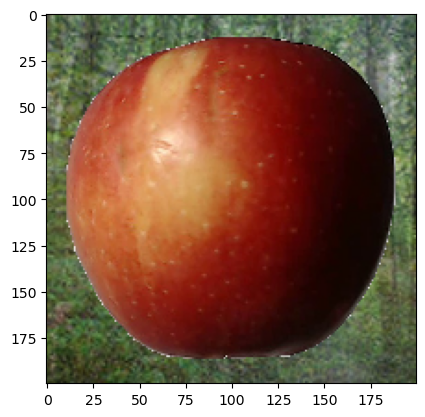

In [27]:
## replace white background
complete_image = masked_image + background_image
plt.imshow(complete_image)

In [28]:
####### Now  export 1 class pictures and store
###### pics with white and blended background 
###### We expect to train the model pattern in which 
###### background of object can be different while
###### the target area is characterised by presence of Red and Round Object

path_export = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\2_Train_Test_Augmented_1_class"

for i in range( 0  ,  len(img_data_array_1_class) ) :  # len(img_data_array_1_class)

    ## generate backgroud
            loc = np.random.randint(1, len(img_data_array_backgroud) ,5 )
           # print( loc )  locations are random
            equal_fraction = 1 / 5
            background = np.zeros_like( img_data_array_backgroud[0] )
            
            list_images = [ img_data_array_backgroud[x] for x in loc ]

            for img in list_images:
                background = background + img * equal_fraction

            background = background.astype(np.uint8) ## cv2 visualise matrices of integers   
      
     ## sequentially process pictures with target
            apple = img_data_array_1_class[i] 
            
            white_filter = (apple[:,:,0] > 230) & (apple[:,:,1] > 230) & (apple[:,:,2] > 230)
            
            masked_image = apple.copy()          
            masked_image[white_filter != 0] = [0, 0, 0]
            
            background[~(white_filter)] = [0,0,0]
            
     ## form final image with new background and export it
    
            complete_image = masked_image + background
        
            complete_image = cv2.cvtColor(complete_image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
            
            path_export_full = os.path.join ( path_export , "picture_"+str(i)+".jpg" )    
            cv2.imwrite(path_export_full, complete_image )
    
     ## export original picture with white background
    
            apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
            path_export_full = os.path.join ( path_export , "picture_orig"+str(i)+".jpg" )          
            cv2.imwrite(path_export_full, apple )
            
            
y_count = len( img_data_array_1_class )  * 2          

In [29]:
[y_count , complete_image.shape]

[5882, (200, 200, 3)]

In [30]:
################ Now generate Train data for 0 class, 
## By cutting piece of picture and adding blended background 
# We slice the picture into 9 parts and selection random one

height = int( IMG_HEIGHT / 3 ) # ( 3 * 3 = 9 pics )
width = int( IMG_WIDTH / 3 )
height,width # debug

(66, 66)

In [31]:
#### We would create coordinates for each piece out of 9 and would sample 
#### 1 sub pic from each downloaded picture of apple
x_start = np.arange( start = 0 , stop = IMG_HEIGHT -  width - 1 , step = width)
y_start = x_start.copy()

In [32]:
#### Reupload data and sample 1 sub image from each photo of target class
folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\2_Train_Test_Augmented_1_class"
# os.listdir( folder_train )

In [33]:
img_data_array_gen_pics=[] # store pixels 

for dir1 in os.listdir ( folder_train ):
         
        image_path= os.path.join(folder_train, dir1)

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture
             
        image = preprocess_image(image, pad_value=0)
           
        ## set coordinates for sub pic (proposal)    
        random_coordinates = np.random.randint(low=0 , high=3, size = 2)
        loc_x = random_coordinates[0]
        loc_y = random_coordinates[1]

        timage =  image[ x_start[loc_x]:(x_start[loc_x]+width) , y_start[loc_y]:(y_start[loc_y]+height) ]
        
        timage = cv2.resize(timage, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                                 interpolation = cv2.INTER_AREA)
        # plt.imshow(buf_del )
        
       
        img_data_array_gen_pics.append(timage) # append each picture to single structure
 

In [34]:
len(img_data_array_gen_pics) == y_count     # debug

True

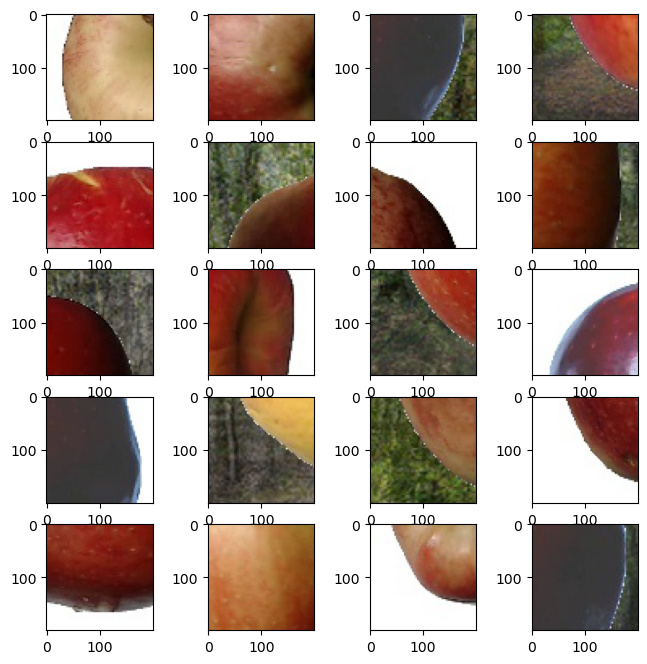

In [35]:
# debug
debug_photo( photo=img_data_array_gen_pics )    

In [36]:
########## Export Augmented photos treated as 0 class

path_export = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\3_Train_Test_Augmented_0_class"

for i in range( 0  ,  len(img_data_array_gen_pics) ) :  # len(img_data_array_1_class)

            complete_image = img_data_array_gen_pics[i]
        
            complete_image = cv2.cvtColor(complete_image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
            
            path_export_full = os.path.join ( path_export , "picture_"+str(i)+".jpg" )
            
            cv2.imwrite(path_export_full, complete_image )

In [37]:
########## Export  0 class photos of Original size , with white and blended background

for i in range( 0  ,  len(img_data_array_0_class) ) :  # len(img_data_array_1_class)

    ## generate backgroud
            loc = np.random.randint(1, len(img_data_array_backgroud) ,5 )
           # print( loc )  locations are random
            equal_fraction = 1 / 5
            background = np.zeros_like( img_data_array_backgroud[0] )
            
            list_images = [ img_data_array_backgroud[x] for x in loc ]

            for img in list_images:
                background = background + img * equal_fraction

            background = background.astype(np.uint8) ## cv2 visualise matrices of integers   
      
     ## sequentially process pictures with target
            other = img_data_array_0_class[i] 
            
            white_filter = (other[:,:,0] > 230) & (other[:,:,1] > 230) & (other[:,:,2] > 230)
            
            masked_image = other.copy()          
            masked_image[white_filter != 0] = [0, 0, 0]
            
            background[~(white_filter)] = [0,0,0]
    
    ## export 0 class with blended background
            complete_image = masked_image + background      
            complete_image = cv2.cvtColor(complete_image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
            
            path_export_full = os.path.join ( path_export , "picture_other"+str(i)+".jpg" )           
            cv2.imwrite(path_export_full, complete_image )
            
    ## export 0 class with original  white         
            other = cv2.cvtColor(other, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
            path_export_full = os.path.join ( path_export , "picture_orig"+str(i)+".jpg" )          
            cv2.imwrite(path_export_full, other )
            
              

In [38]:
img_data_array_0_class[0].size

120000

In [39]:
######### Export Non Augmented 0 class stored in img_data_array_backgroud

path_export = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\4_Train_Test_NON_Augmented_0_class"

for i in range( 0  ,  len(img_data_array_backgroud) ) :  # len(img_data_array_1_class)

            complete_image = img_data_array_backgroud[i]
        
            complete_image = cv2.cvtColor(complete_image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
            
            path_export_full = os.path.join ( path_export , "picture_nature"+str(i)+".jpg" )
            
            cv2.imwrite(path_export_full, complete_image )

In [40]:
###  count of 1 class
y_count

5882

In [41]:
# count of 0 class
y0_count = len( os.listdir(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\3_Train_Test_Augmented_0_class") ) 

In [42]:
y0_count+=len(os.listdir(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\4_Train_Test_NON_Augmented_0_class"))

In [43]:
# check class balance , should be more than 20%
[ y_count, y0_count , y_count / (y_count + y0_count) ]

[5882, 14282, 0.2917079944455465]

In [44]:
folder_test_fn= r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\5_Test_FN_0_class"
folder_test_fn

'D:\\0_Desctop_Files\\Learning\\UTM_Project\\1_Prototype\\5_Test_FN_0_class'

In [45]:
## Import pictures of fruits or vegetables whose color and form is similar to 
## color and form of class 1 (False Negatives)

img_data_fn_array_0_class=[] # store pixels  of 0 class

for dir1 in os.listdir(folder_test_fn): # loop through folder in main directory
    for dir2 in os.listdir ( os.path.join(folder_test_fn, dir1) ): # loop through jpg's in each folder    
        
         if "Augmented" not in dir1: # we skip forest_train_test, used later 
            
            image_path= os.path.join(folder_test_fn, dir1,  dir2) # full path to file we need to upload

            image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions

            image = preprocess_image(image)

            img_data_fn_array_0_class.append(image) # append each picture to single structure
 

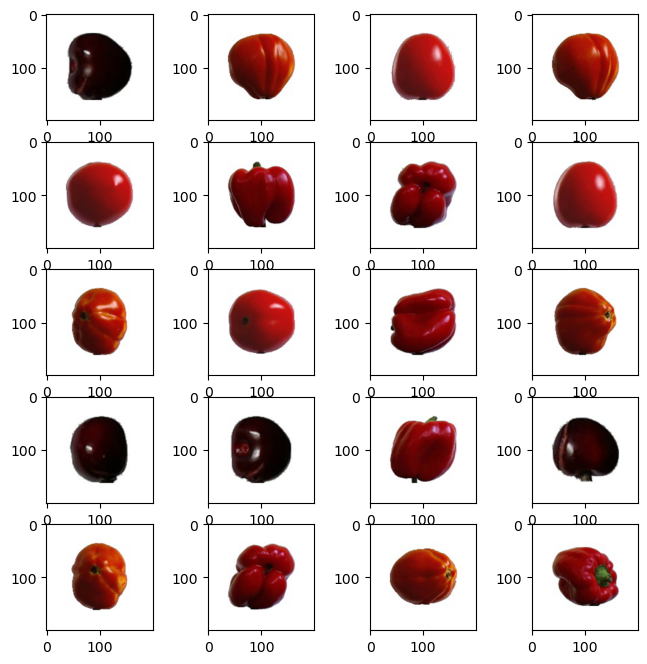

In [46]:
debug_photo( photo=img_data_fn_array_0_class )    

In [47]:
####### Export Augmented False Negatives
### Original and with adjusted backfround

path_export = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\5_Test_FN_0_class\Augmented_1"

for i in range( 0  ,  len(img_data_fn_array_0_class) ) :  # len(img_data_array_1_class)

    ## generate backgroud
            loc = np.random.randint(1, len(img_data_array_backgroud) ,5 )
           # print( loc )  locations are random
            equal_fraction = 1 / 5
            background = np.zeros_like( img_data_array_backgroud[0] )
            
            list_images = [ img_data_array_backgroud[x] for x in loc ]

            for img in list_images:
                background = background + img * equal_fraction

            background = background.astype(np.uint8) ## cv2 visualise matrices of integers   
      
     ## sequentially process pictures with target
            apple = img_data_fn_array_0_class[i] 
            
            white_filter = (apple[:,:,0] > 230) & (apple[:,:,1] > 230) & (apple[:,:,2] > 230)
            
            masked_image = apple.copy()          
            masked_image[white_filter != 0] = [0, 0, 0]
            
            background[~(white_filter)] = [0,0,0]
            
     ## form final image with new background and export it
    
            complete_image = masked_image + background
        
            complete_image = cv2.cvtColor(complete_image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
            
            path_export_full = os.path.join ( path_export , "picture_"+str(i)+".jpg" )    
            cv2.imwrite(path_export_full, complete_image )
    
     ## export original picture with white background
    
            apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
            path_export_full = os.path.join ( path_export , "picture_orig"+str(i)+".jpg" )          
            cv2.imwrite(path_export_full, apple )
 

In [48]:
######### Generate pictures with color scheme identical to class 1 photo but of different shape

folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\1_Raw_Data_Train_Test"

img_data_array_1_class_alt_form=[] # store pixels  of 0 class

for dir1 in os.listdir(folder_train): # loop through folder in main directory
    for dir2 in os.listdir ( os.path.join(folder_train, dir1) ): # loop through jpg's in each folder
              
        if dir1.split("_")[1]=="y": # if folder with pictures contains "y" in name , then its 1, red apple, 0 otherwise
                    
                image_path= os.path.join(folder_train, dir1,  dir2) # full path to file we need to upload

                image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions
                
                image = preprocess_image(image)

                img_data_array_1_class_alt_form.append(image) # append each picture to single structure
                           

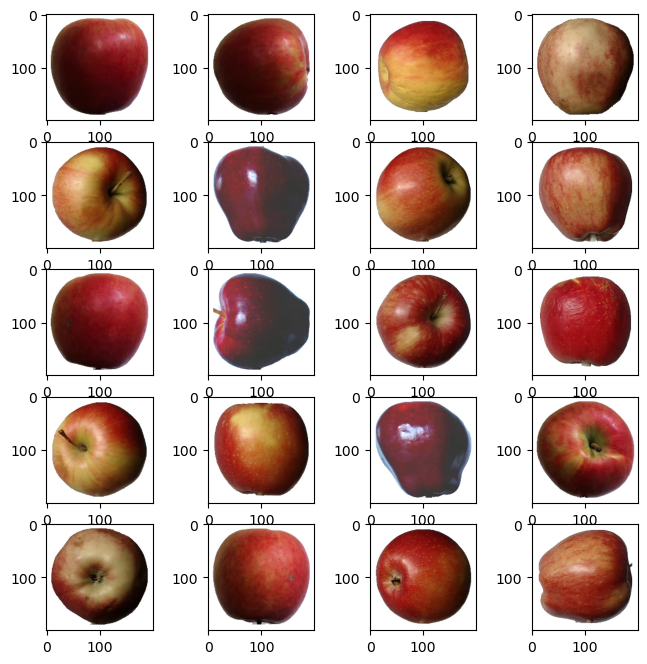

In [49]:
debug_photo( photo=img_data_array_1_class_alt_form )    

In [50]:
######### Estimate location of center
image_center = [ int(IMG_HEIGHT/2)  , int(IMG_WIDTH/2) ] 
image_center # considered as first element in 2 by 2 matrix

[100, 100]

In [51]:
#####  Verify process over a single picture
timg = img_data_array_1_class_alt_form[2].copy()
#plt.imshow(timg)

In [52]:
x = image_center[0]
y = image_center[1]

In [53]:
timg[ (x-1):(x+1) , (y-1):(y+1)  ]

array([[[139,  26,  12],
        [139,  25,  14]],

       [[138,  25,  10],
        [138,  24,  13]]], dtype=uint8)

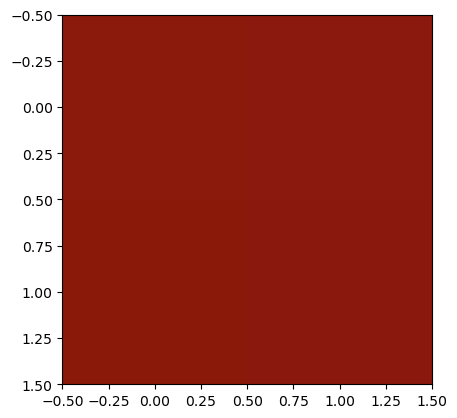

In [54]:
plt.imshow(  timg[ (x-1):(x+1) , (y-1):(y+1)  ]  )

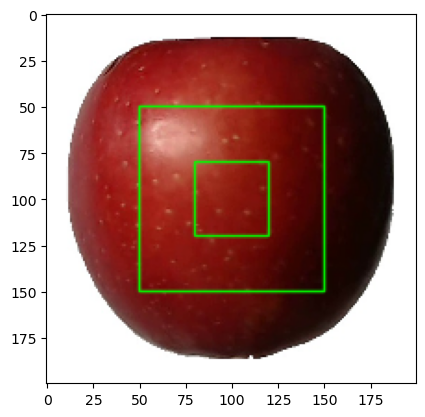

In [56]:
cv2.rectangle(timg, (x-50, y-50), (x+50, y+50), (0, 255, 0), 1, cv2.LINE_AA)
cv2.rectangle(timg, (x-20, y-20), (x+20, y+20), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow( timg )
timg = img_data_array_1_class_alt_form[2].copy()

In [60]:
count = 0
step = 1

while count == 0 :
    buf = timg[ (x-step):(x+step) , (y-step):(y+step)  ]
   # print(buf)
   # if np.any(buf>230): # white points can be presented inside object, we need to check all 4 marginal points
    
    st_2 = 2 # forward look
    
    if np.all( timg[ x-step-st_2 , y-step-st_2 ] >230) & np.all( timg[ x+step+st_2 , y+step+st_2 ] >230) & np.all( timg[ x-step-st_2 , y+step+st_2 ] >230) & np.all( timg[ x+step+st_2 , y-step-st_2 ] >230):
        count = 1
    else:
         step+=1
step                       

68

In [61]:
buf = timg[ (x-step):(x+step) , (y-step):(y+step)  ]

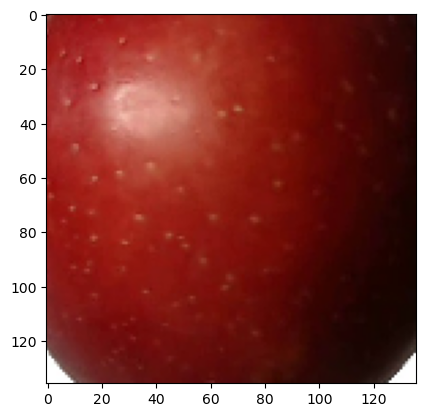

In [62]:
plt.imshow( buf ) ### all 4 must fit condition, thats why white padding can still be present

In [63]:
###### Repeat the process in the loop

####### Export Augmented False Negatives
### objects have identical to class 1 rgb profile , but different form

x = image_center[0]
y = image_center[1]

path_export = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\5_Test_FN_0_class\Augmented_2"

for i in range( 0  ,  len(img_data_array_1_class_alt_form) ) :  # len(img_data_array_1_class)
    
     ## sequentially process pictures with target
            timg = img_data_array_1_class_alt_form[i].copy() 
            
            count = 0
            step = 1
            st_2 = 2
            
            while count == 0 :
                buf = timg[ (x-step):(x+step) , (y-step):(y+step)  ]

                if np.all( timg[ x-step-st_2 , y-step-st_2 ] >230) & np.all( timg[ x+step+st_2 , y+step+st_2 ] >230) & np.all( timg[ x-step-st_2 , y+step+st_2 ] >230) & np.all( timg[ x+step+st_2 , y-step-st_2 ] >230):
                    count = 1
                else:
                     step+=1
                        
            buf = preprocess_image(buf)              
    
            path_export_full = os.path.join ( path_export , "picture_dif_form"+str(i)+".jpg" )          
            cv2.imwrite(path_export_full, buf )
 

In [64]:
######## Visualise distribution of pixel values for each channel, for each apple
### generate pandas data frame from numpy array

folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\1_Raw_Data_Train_Test"

img_data_array_numpy_to_pandas=[] # store pixels  of 0 class
apple_type=[]

for dir1 in os.listdir(folder_train): # loop through folder in main directory
    for dir2 in os.listdir ( os.path.join(folder_train, dir1) ): # loop through jpg's in each folder
              
        if dir1.split("_")[1]=="y": # if folder with pictures contains "y" in name , then its 1, red apple, 0 otherwise
                    
                image_path= os.path.join(folder_train, dir1,  dir2) # full path to file we need to upload

                image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions
                
                image = preprocess_image(image ,  h=100 , w=100 , color_scheme=cv2.COLOR_BGR2GRAY) # to limit size of data frmae

                img_data_array_numpy_to_pandas.append(image) # append each picture to single structure
                
                apple_type.append( dir1 )

In [65]:
[ len( apple_type ) , len(img_data_array_numpy_to_pandas) ]

[2941, 2941]

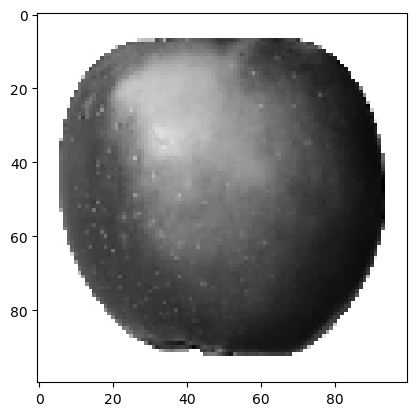

In [66]:
plt.imshow( img_data_array_numpy_to_pandas[100], cmap="gray" )

In [67]:
img_data_array_numpy_to_pandas = np.array( img_data_array_numpy_to_pandas, dtype = "int16" )

In [68]:
list_of_pixels = []
list_of_names = []

for i in range( 0 , len(img_data_array_numpy_to_pandas) ): 
    buf = img_data_array_numpy_to_pandas[i].copy()
    buf = buf.flatten().tolist()
    picture_names = [ apple_type[i] for x in range(0 , len(buf) ) ]
   # buf = [ x for x in buf if x<255 ] # its related to apple type list

    list_of_names.append( picture_names )
    list_of_pixels.append( buf )
    

In [69]:
[ len(list_of_pixels[0]) , len( list_of_pixels[0] )  ]

[10000, 10000]

In [70]:
[ len(list_of_pixels[10]) , len( list_of_pixels[10] )  ]

[10000, 10000]

In [71]:
flat_list_pixels = []
for sublist in list_of_pixels:
    for item in sublist:
        flat_list_pixels.append(item)        
len( flat_list_pixels )        

29410000

In [72]:
flat_list_names = []
for sublist in list_of_names:
    for item in sublist:
        flat_list_names.append(item)        
len( flat_list_names )       

29410000

In [73]:
### indices of values equal to 255
loc = []
for i in range(0, len(flat_list_pixels)):
    if flat_list_pixels[i] < 250:
        loc.append(i)
len(loc)        

18597399

In [74]:
flat_list_pixels = [flat_list_pixels[i] for i in loc]
flat_list_names = [flat_list_names[i] for i in loc]

In [75]:
[ len( flat_list_pixels ) , len(flat_list_names) ]

[18597399, 18597399]

In [76]:
# form dictionary

dict_buf = { "pixel_value":flat_list_pixels , 
             "apple_type":flat_list_names }
# dict_buf

In [77]:
import pandas as pd

df1 = pd.DataFrame.from_dict(dict_buf)
df1.head(5)


,pixel_value,apple_type
0,87,apple_y_braeburn_1
1,89,apple_y_braeburn_1
2,103,apple_y_braeburn_1
3,99,apple_y_braeburn_1
4,96,apple_y_braeburn_1


<AxesSubplot:xlabel='apple_type', ylabel='pixel_value'>

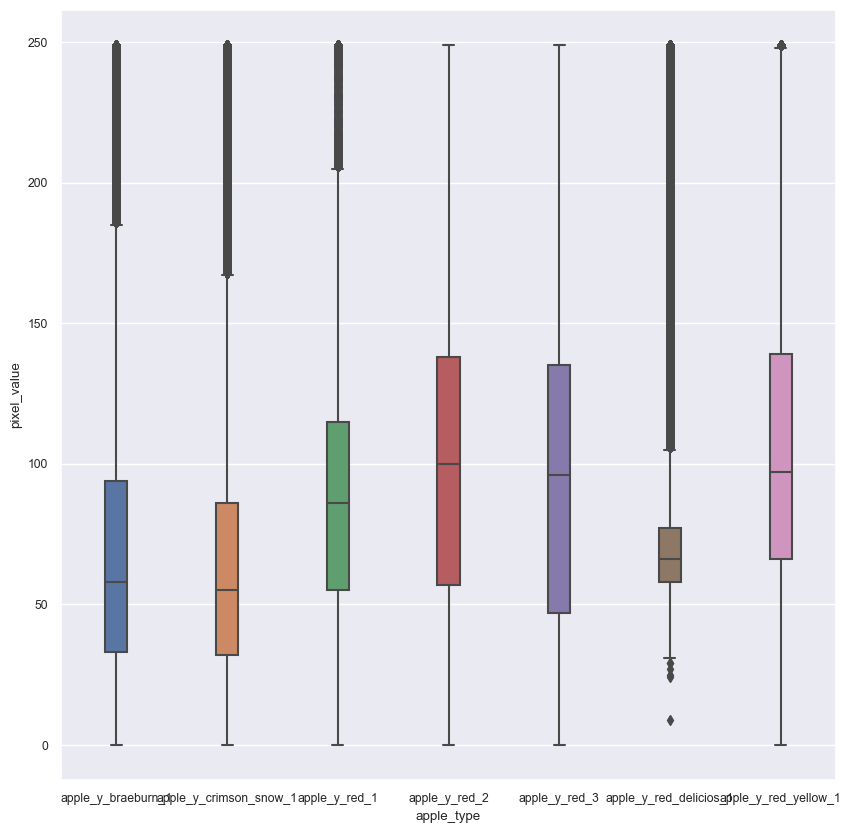

In [79]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale=0.8)
#sns.set(font_scale=0.1)
sns.boxplot(data=df1, x="apple_type", y="pixel_value",  width=0.2)

In [84]:
####### Add background for synthetic pics with multiple objects

folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\Test_Object_Detection_Synthetic"

img_data_multiple_objects=[] # store pixels  of 0 class

for dir1 in os.listdir(folder_train): # loop through folder in main directory
                                
                image_path= os.path.join(folder_train, dir1) # full path to file we need to upload
                image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions               
                image = preprocess_image(x = image, pad_value=0)
                img_data_multiple_objects.append(image) # append each picture to single structure
  

len(img_data_multiple_objects)

2

In [85]:
path_export = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\Test_Object_Detection_Synthetic"

for i in range( 0  ,  len(img_data_multiple_objects) ) :  # len(img_data_array_1_class)

    ## generate backgroud
            loc = np.random.randint(1, len(img_data_array_backgroud) ,5 )
           # print( loc )  locations are random
            equal_fraction = 1 / 5
            background = np.zeros_like( img_data_array_backgroud[0] )
            
            list_images = [ img_data_array_backgroud[x] for x in loc ]

            for img in list_images:
                background = background + img * equal_fraction

            background = background.astype(np.uint8) ## cv2 visualise matrices of integers   
      
     ## sequentially process pictures with target
            apple = img_data_multiple_objects[i]            
            white_filter = (apple[:,:,0] > 230) & (apple[:,:,1] > 230) & (apple[:,:,2] > 230)            
            masked_image = apple.copy()          
            masked_image[white_filter != 0] = [0, 0, 0]
            
            background[~(white_filter)] = [0,0,0]
            
     ## form final image with new background and export it
    
            complete_image = masked_image + background       
            complete_image = cv2.cvtColor(complete_image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB           
            path_export_full = os.path.join ( path_export , "apple_"+str(i)+"_adjusted.jpg" )    
            cv2.imwrite(path_export_full, complete_image )
     